In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis

In [93]:
# Load dataset
stroke_df = pd.read_csv("dataset/stroke-dataset.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Show basic statistics

In [94]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Check for null values in the dataset

In [95]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [96]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Check for any duplicates.

In [97]:
# Checks for duplicate rows
print(stroke_df.duplicated().values.any())
print(stroke_df.shape)


False
(5110, 12)


Check the null values in BMI since it is the only column that contains null values.

In [98]:
# Checking fields where bmi is null
stroke_df[stroke_df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


There are only 201 rows that are NaN. Therefore they should not be dropped.

Select columns where data types is float or int and plot a histogram.

In [99]:
numerical_columns = stroke_df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\seaborn

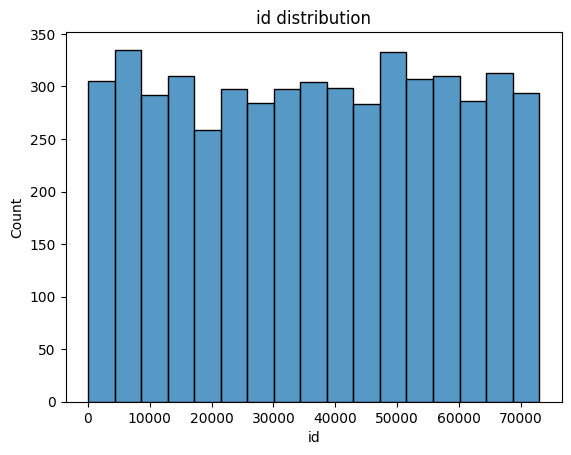

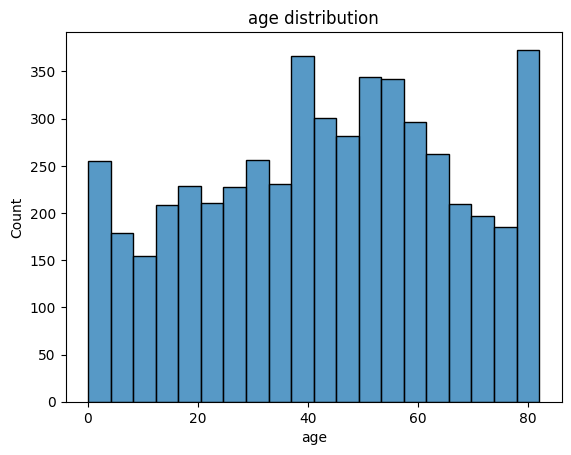

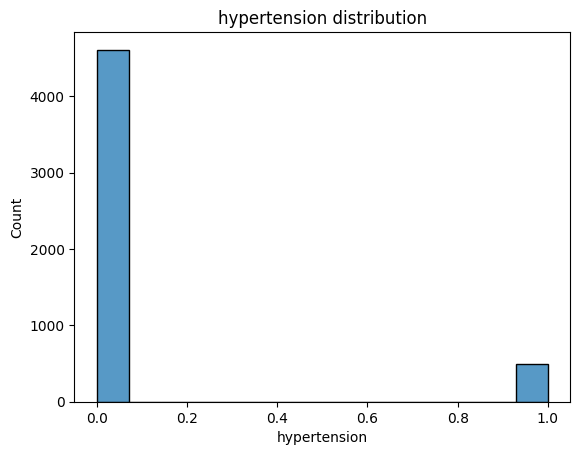

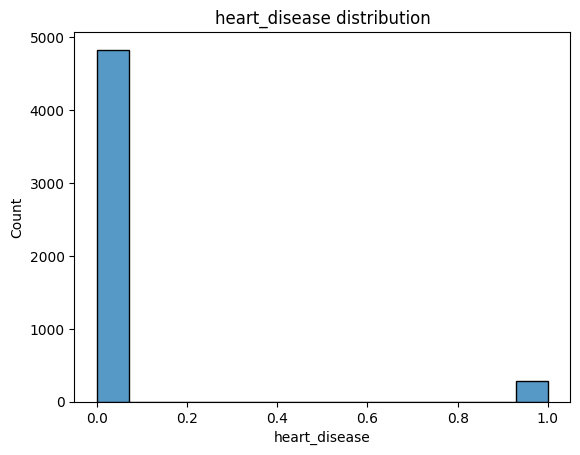

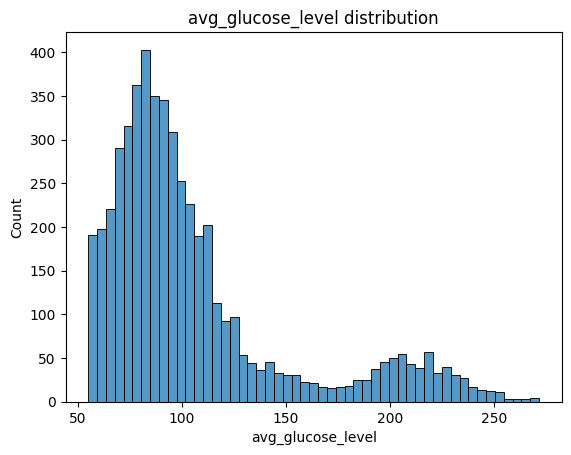

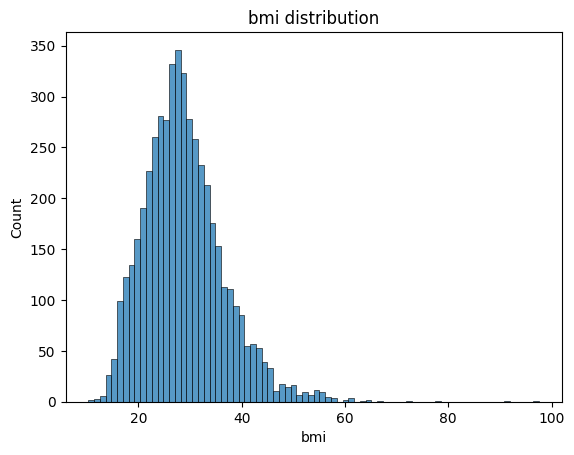

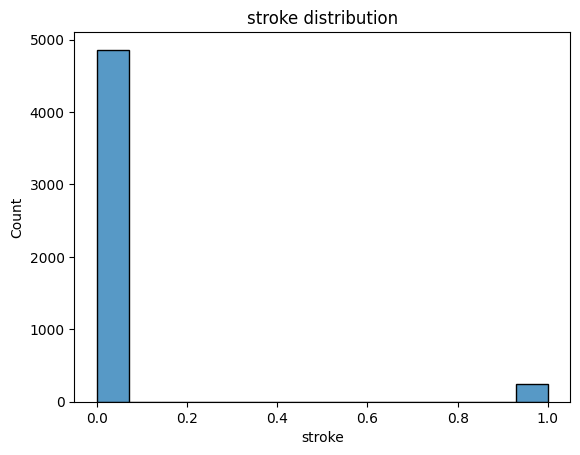

In [100]:
def graph_df(stroke_df):
    for column in numerical_columns:
        plt.figure()
        sns.histplot(data=stroke_df, x=column)
        plt.title(f'{column} distribution')
        
graph_df(stroke_df)

In [101]:
stroke_df[['bmi', 'avg_glucose_level']].skew()

bmi                  1.055340
avg_glucose_level    1.572284
dtype: float64

As seen from the stroke distribution graph, only a small number of the data has stroke, therefore the dataset is imbalanced.

But first, some data should be preprocessed first.

Since only 201 out of 5110 data points are missing for the `bmi` column, imputation will be performed in the column.

In [102]:
stroke_df['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [103]:
stroke_df['bmi'] = stroke_df['bmi'].fillna(stroke_df['bmi'].mean())
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Check for outliers in numerical columns

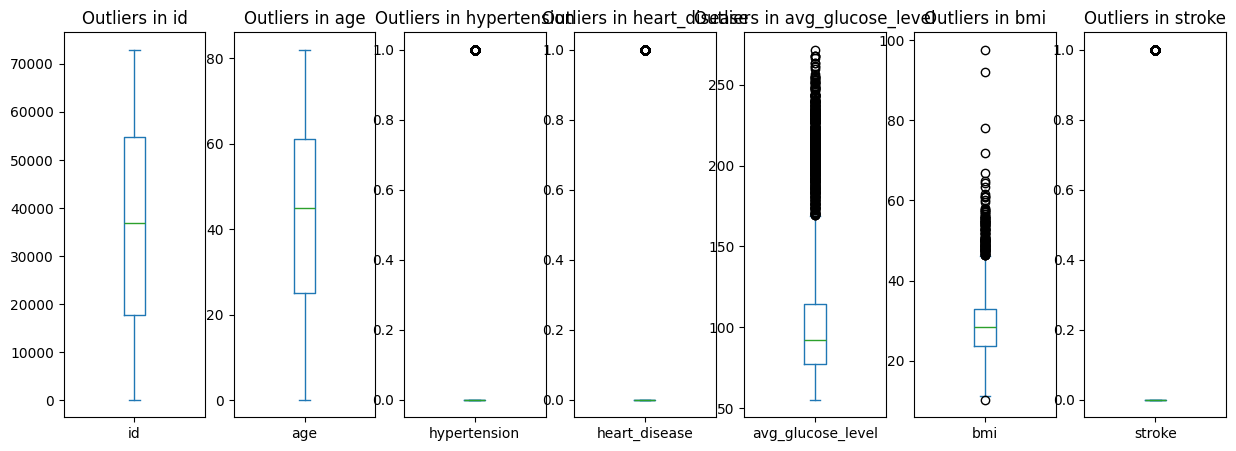

In [104]:
# Plot boxplots for each numerical column to show outliers
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5))

# Original columns
for ax, col in zip(axes, numerical_columns):
    stroke_df[col].plot(kind='box', ax=ax)
    ax.set_title(f'Outliers in {col}')

plt.show()

Turn categorical columns for one-hot encoding

In [105]:
categories = stroke_df.select_dtypes(include=['object']).columns
categories


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [106]:
from sklearn.preprocessing import OneHotEncoder

categories = stroke_df.select_dtypes(include=['object']).columns

# Create OneHotEncoder object
encoder =  OneHotEncoder()

for column in categories:
    one_hot_array = encoder.fit_transform(stroke_df[[column]]).toarray()
    one_hot_df = pd.DataFrame(one_hot_array, columns=encoder.get_feature_names_out())
    stroke_df = pd.concat([stroke_df, one_hot_df], axis=1).drop([column], axis=1)
print(stroke_df.head())
# Fit and Transform


      id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046  67.0             0              1             228.69  36.600000   
1  51676  61.0             0              0             202.21  28.893237   
2  31112  80.0             0              1             105.92  32.500000   
3  60182  49.0             0              0             171.23  34.400000   
4   1665  79.0             1              0             174.12  24.000000   

   stroke  gender_Female  gender_Male  gender_Other  ...  \
0       1            0.0          1.0           0.0  ...   
1       1            1.0          0.0           0.0  ...   
2       1            0.0          1.0           0.0  ...   
3       1            1.0          0.0           0.0  ...   
4       1            1.0          0.0           0.0  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                     0.0                1.0                      0.0   
1                     0.0     

Perform scaling on the numerical column

In [107]:
print(numerical_columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [108]:
list_num_col = list(numerical_columns)
stroke_df[list_num_col]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.600000,1
1,51676,61.0,0,0,202.21,28.893237,1
2,31112,80.0,0,1,105.92,32.500000,1
3,60182,49.0,0,0,171.23,34.400000,1
4,1665,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0
5106,44873,81.0,0,0,125.20,40.000000,0
5107,19723,35.0,0,0,82.99,30.600000,0
5108,37544,51.0,0,0,166.29,25.600000,0


In [109]:
# Create scaler object
scaler = StandardScaler()

# Perform scaling
scaled_values = scaler.fit_transform(stroke_df[['avg_glucose_level', 'bmi']])

# Convert scaled values back to pandas datarame and assign column names
df_scaled = pd.DataFrame(scaled_values, columns=['avg_glucose_level', 'bmi'], index=stroke_df.index)

# Replace the original columns in the DataFrame with the scaled ones

stroke_df[['avg_glucose_level', 'bmi']] = df_scaled
print(stroke_df)

         id   age  hypertension  heart_disease  avg_glucose_level  \
0      9046  67.0             0              1           2.706375   
1     51676  61.0             0              0           2.121559   
2     31112  80.0             0              1          -0.005028   
3     60182  49.0             0              0           1.437358   
4      1665  79.0             1              0           1.501184   
...     ...   ...           ...            ...                ...   
5105  18234  80.0             1              0          -0.494658   
5106  44873  81.0             0              0           0.420775   
5107  19723  35.0             0              0          -0.511443   
5108  37544  51.0             0              0           1.328257   
5109  44679  44.0             0              0          -0.460867   

               bmi  stroke  gender_Female  gender_Male  gender_Other  ...  \
0     1.001234e+00       1            0.0          1.0           0.0  ...   
1     4.615554e-1

Bmi and glucose level have been scaled as seen below.

In [110]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,1.001156e-16,2.224791e-17,0.048728,0.585910,0.413894,0.000196,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,21161.721625,22.612647,0.296607,0.226063,1.000098e+00,1.000098e+00,0.215320,0.492612,0.492578,0.013989,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,67.000000,0.080000,0.000000,0.000000,-1.126958e+00,-2.415564e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,-6.383223e-01,-6.616944e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,-3.149945e-01,-6.407951e-02,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,1.754080e-01,5.075521e-01,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,3.657145e+00,8.926127e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Addressing Skewness

As seen from the graphs in the previous cells, bmi and glucose levels are right-skewed.

In [111]:
skewed_cols = ['bmi', 'avg_glucose_level','hypertension', 'heart_disease']
stroke_df[skewed_cols].skew()

bmi                  1.076716
avg_glucose_level    1.572284
hypertension         2.715392
heart_disease        3.947244
dtype: float64

However, as seen from the graph below, it is still skewed after applying transformation. Therefore transformation will not be applied to the dataset.

In [112]:
def log_transform(x):
    return np.log1p(x)

temp_df = stroke_df.copy()
temp_df['bmi'] = np.log1p(temp_df['bmi'])
temp_df['avg_glucose_level'] = np.log1p(temp_df['avg_glucose_level'])
temp_df['hypertension'] = np.log1p(temp_df['hypertension'])
temp_df['heart_disease'] = np.log1p(temp_df['heart_disease'])

temp_df[skewed_cols].skew()

c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


bmi                 -2.311888
avg_glucose_level   -1.008497
hypertension         2.715392
heart_disease        3.947244
dtype: float64

c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\seaborn

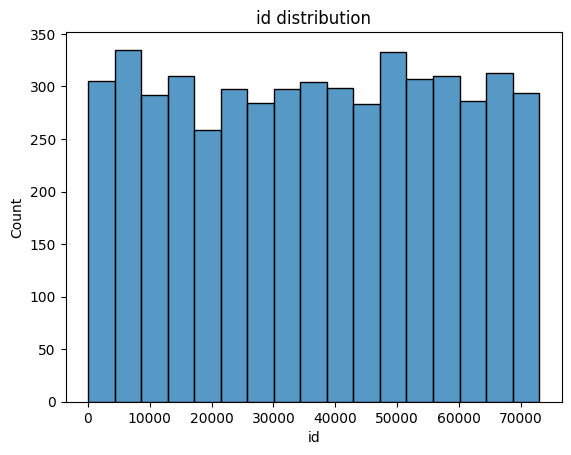

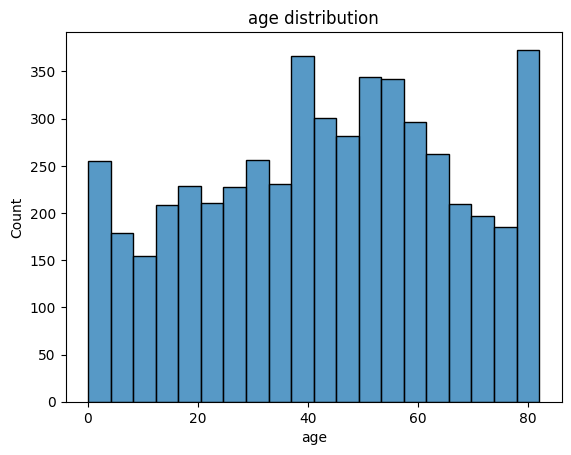

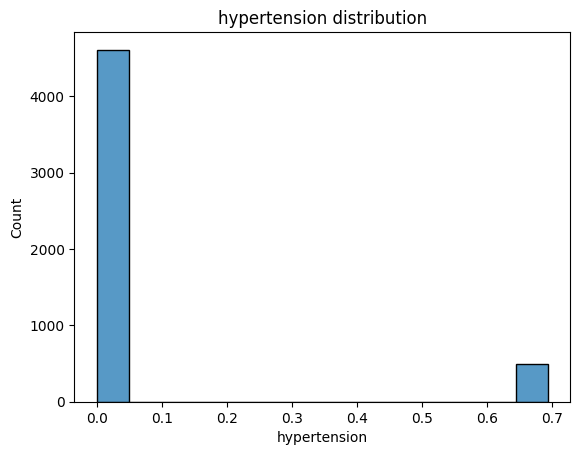

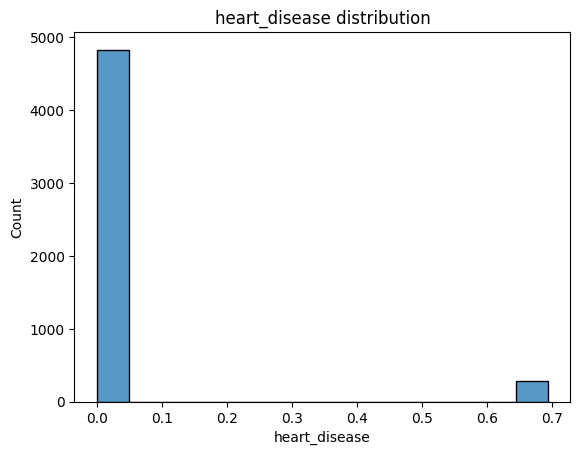

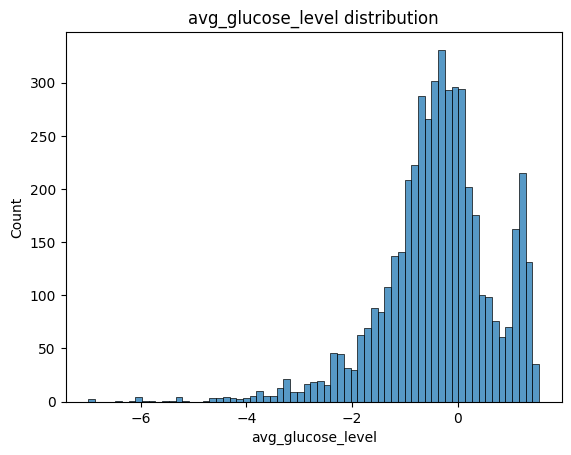

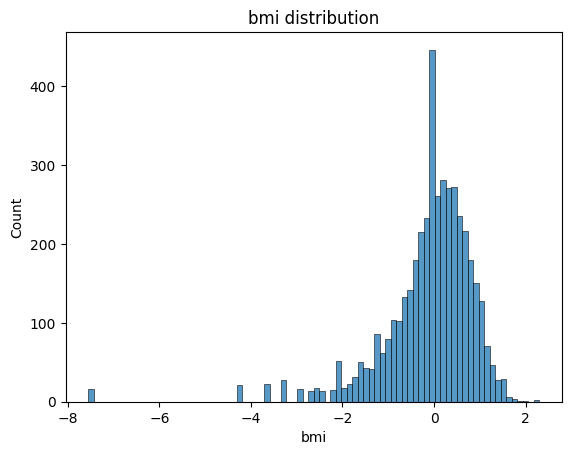

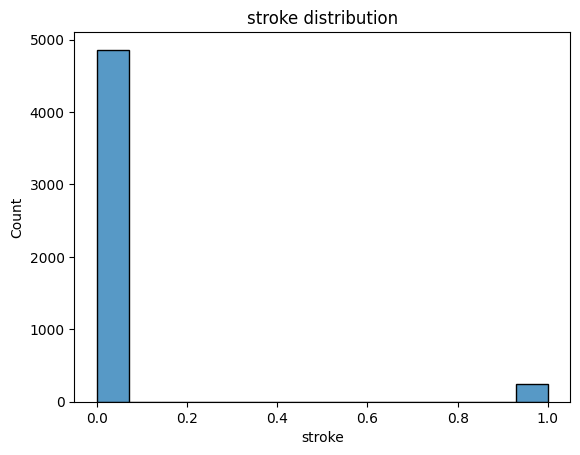

In [113]:
graph_df(temp_df)

## Addressing Imbalance Dataset

In [114]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


Split dataset into train and test

In [115]:
stroke_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,2.706375,1.001234e+00,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,2.121559,4.615554e-16,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,-0.005028,4.685773e-01,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,1.437358,7.154182e-01,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,1.501184,-6.357112e-01,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,-0.494658,4.615554e-16,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,44873,81.0,0,0,0.420775,1.442949e+00,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,19723,35.0,0,0,-0.511443,2.217363e-01,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,51.0,0,0,1.328257,-4.278451e-01,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [116]:
# Features
X = stroke_df.drop(['id', 'stroke'], axis=1)

# Labels
y = stroke_df['stroke']

# Prepare features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

print("Number X_train: ", X_train.shape)
print("Number y_train: ", y_train.shape)
print("Number X_test: ", X_test.shape)
print("Number y_test: ", y_test.shape)

Number X_train:  (3832, 21)
Number y_train:  (3832,)
Number X_test:  (1278, 21)
Number y_test:  (1278,)


In [117]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)

print(classification_report(y_test, predictions))

print("accuracy_score: ", accuracy_score(y_test, predictions))
print("Balanced accuracy score:", balanced_accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1218
           1       1.00      0.02      0.03        60

    accuracy                           0.95      1278
   macro avg       0.98      0.51      0.50      1278
weighted avg       0.96      0.95      0.93      1278

accuracy_score:  0.9538341158059468
Balanced accuracy score: 0.5083333333333333


c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Use SMOTE to balance the dataset

In [118]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=27)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

In [119]:
lr_model.fit(smote_X_train, smote_y_train)

predictions = lr_model.predict(X_test)

print(classification_report(y_test, predictions))

print("accuracy_score: ", accuracy_score(y_test, predictions))
print("Balanced accuracy score:", balanced_accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83      1218
           1       0.11      0.72      0.19        60

    accuracy                           0.71      1278
   macro avg       0.55      0.72      0.51      1278
weighted avg       0.94      0.71      0.80      1278

accuracy_score:  0.7143974960876369
Balanced accuracy score: 0.7154761904761905


c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Balanced accuracy score is better now after applying SMOTE.

In [120]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_clf = CalibratedClassifierCV(lr_model, method='sigmoid')
calibrated_clf.fit(smote_X_train, smote_y_train)
predict_probabilities = calibrated_clf.predict_proba(X_test)
test_accuracy = balanced_accuracy_score(y_test, predictions)

print("test accuracy: ", test_accuracy)


c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

test accuracy:  0.7154761904761905


c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\WDIMACULANGAN\Desktop\Activity\ml-django-integration\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

In [121]:
model_filename = 'models/stroke_clf.joblib'
ohe_filename = 'models/encoder.joblib'
scaler_filename = 'models/scaler.joblib'
calibrated_clf_filename = 'models/stroke_calibrated_clf.joblib'

joblib.dump(lr_model, model_filename)
joblib.dump(encoder, ohe_filename)
joblib.dump(scaler, scaler_filename)
joblib.dump(calibrated_clf, calibrated_clf_filename)


['models/stroke_calibrated_clf.joblib']